In [1]:
cd ..

/Users/simonwolf/git/aaa21


In [2]:
import cleaning
import utils
import seaborn as sns

In [3]:
cleaning.clean_dataset(verbose=True)

Read the data set
Start cleaning the data set
5037633 invalid spatial entries have been successfully removed!
--> 632442 invalid entries found in Trip Seconds
--> 3967441 invalid entries found in Trip Miles
--> 72 invalid entries found in Fare
--> 0 invalid entries found in Tips
--> 4538325 invalid entries found in Tolls
--> 0 invalid entries found in Extras
--> 0 invalid entries found in Trip Total
9138280 invalid entries have been successfully dropped!
--> 877550 outlier detected and removed from Trip Seconds column using zscore
--> 21078 outlier detected and removed from Trip Miles column using zscore
--> 1262 outlier detected and removed from Fare column using zscore
--> 1111790 outlier detected and removed from Tips column using zscore
--> 741 outlier detected and removed from Tolls column using zscore
--> 1261 outlier detected and removed from Extras column using zscore
--> 996391 outlier detected and removed from Trip Total column using zscore
Outlier detection completed. Number

In [4]:
after = utils.read_parquet("Taxi_Trips_cleaned.parquet")
after

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,...,Trip Start Month,Trip Start Day,Trip Start Hour,Trip Start Weekday,Trip Start Is Weekend,Trip End Month,Trip End Day,Trip End Hour,Trip End Weekday,Trip End Is Weekend
0,240.0,1.20,nan,nan,1.0,1.0,5.65,0.0,0.0,0.0,...,1,1,0,3,0,1,1,0,3,0
1,240.0,0.70,nan,nan,31.0,28.0,5.25,0.0,0.0,1.0,...,2,20,23,4,0,2,20,23,4,0
2,900.0,3.50,nan,nan,28.0,8.0,11.25,0.0,0.0,1.0,...,2,20,22,4,0,2,20,22,4,0
3,480.0,2.20,nan,nan,31.0,5.0,8.05,0.0,0.0,2.0,...,2,21,1,5,1,2,21,2,5,1
4,300.0,0.90,17031081700.0,17031081000.0,8.0,8.0,5.45,0.0,0.0,0.0,...,2,20,20,4,0,2,20,20,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15197492,300.0,1.10,17031839100.0,17031281900.0,32.0,28.0,5.65,0.0,0.0,1.0,...,12,27,22,6,1,12,27,22,6,1
15197493,300.0,1.00,17031320100.0,17031030900.0,32.0,77.0,5.45,0.0,0.0,1.0,...,12,31,19,3,0,12,31,19,3,0
15197494,300.0,0.60,17031081201.0,17031081700.0,8.0,8.0,5.05,0.0,0.0,0.0,...,12,31,14,3,0,12,31,14,3,0
15197495,360.0,0.53,nan,nan,5.0,5.0,6.05,0.0,0.0,0.0,...,12,30,9,2,0,12,30,10,2,0


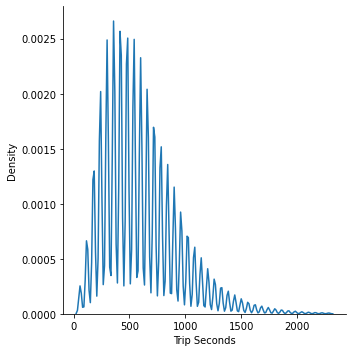

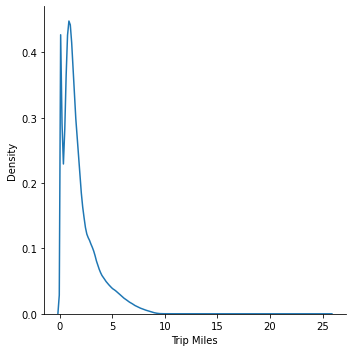

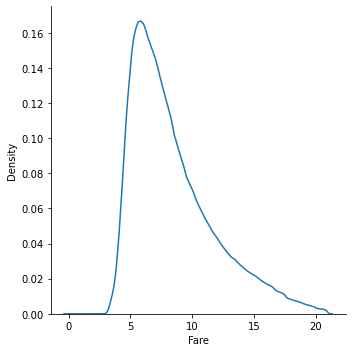

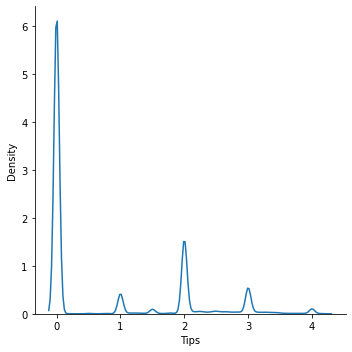

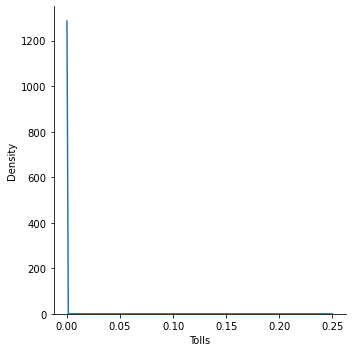

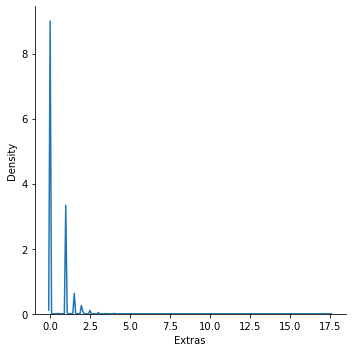

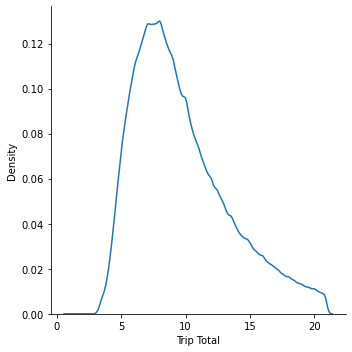

In [5]:
for col in [
            "Trip Seconds",
            "Trip Miles",
            "Fare",
            "Tips",
            "Tolls",
            "Extras",
            "Trip Total"
        ]:
    sns.displot(after, x=col, kind="kde")

In [6]:
after.isna().sum()

Trip Seconds                        0
Trip Miles                          0
Pickup Census Tract                 0
Dropoff Census Tract                0
Pickup Community Area               0
Dropoff Community Area              0
Fare                                0
Tips                                0
Tolls                               0
Extras                              0
Trip Total                          0
Taxi ID                             0
Payment Type                        0
Company                       6353401
Pickup Centroid Latitude            0
Pickup Centroid Longitude           0
Dropoff Centroid Latitude           0
Dropoff Centroid Longitude          0
Trip Start Month                    0
Trip Start Day                      0
Trip Start Hour                     0
Trip Start Weekday                  0
Trip Start Is Weekend               0
Trip End Month                      0
Trip End Day                        0
Trip End Hour                       0
Trip End Wee

In [7]:
after.eq('').sum()

Trip Seconds                  0
Trip Miles                    0
Pickup Census Tract           0
Dropoff Census Tract          0
Pickup Community Area         0
Dropoff Community Area        0
Fare                          0
Tips                          0
Tolls                         0
Extras                        0
Trip Total                    0
Taxi ID                       0
Payment Type                  0
Company                       0
Pickup Centroid Latitude      0
Pickup Centroid Longitude     0
Dropoff Centroid Latitude     0
Dropoff Centroid Longitude    0
Trip Start Month              0
Trip Start Day                0
Trip Start Hour               0
Trip Start Weekday            0
Trip Start Is Weekend         0
Trip End Month                0
Trip End Day                  0
Trip End Hour                 0
Trip End Weekday              0
Trip End Is Weekend           0
dtype: int64

In [8]:
after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15197497 entries, 0 to 15197496
Data columns (total 28 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   Trip Seconds                float64 
 1   Trip Miles                  float64 
 2   Pickup Census Tract         object  
 3   Dropoff Census Tract        object  
 4   Pickup Community Area       object  
 5   Dropoff Community Area      object  
 6   Fare                        float64 
 7   Tips                        float64 
 8   Tolls                       float64 
 9   Extras                      float64 
 10  Trip Total                  float64 
 11  Taxi ID                     object  
 12  Payment Type                category
 13  Company                     category
 14  Pickup Centroid Latitude    float64 
 15  Pickup Centroid Longitude   float64 
 16  Dropoff Centroid Latitude   float64 
 17  Dropoff Centroid Longitude  float64 
 18  Trip Start Month            int64   
 19

In [9]:
after.head(50)

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,...,Trip Start Month,Trip Start Day,Trip Start Hour,Trip Start Weekday,Trip Start Is Weekend,Trip End Month,Trip End Day,Trip End Hour,Trip End Weekday,Trip End Is Weekend
0,240.0,1.20,nan,nan,1.0,1.0,5.65,0.00,0.0,0.0,...,1,1,0,3,0,1,1,0,3,0
1,240.0,0.70,nan,nan,31.0,28.0,5.25,0.00,0.0,1.0,...,2,20,23,4,0,2,20,23,4,0
2,900.0,3.50,nan,nan,28.0,8.0,11.25,0.00,0.0,1.0,...,2,20,22,4,0,2,20,22,4,0
3,480.0,2.20,nan,nan,31.0,5.0,8.05,0.00,0.0,2.0,...,2,21,1,5,1,2,21,2,5,1
4,300.0,0.90,17031081700.0,17031081000.0,8.0,8.0,5.45,0.00,0.0,0.0,...,2,20,20,4,0,2,20,20,4,0
5,540.0,3.00,17031833000.0,17031310200.0,28.0,31.0,9.45,0.00,0.0,0.0,...,2,20,23,4,0,2,20,23,4,0
6,300.0,1.20,17031842300.0,17031242300.0,24.0,24.0,5.65,0.00,0.0,0.0,...,2,20,22,4,0,2,20,22,4,0
7,780.0,2.50,nan,nan,6.0,16.0,9.65,0.00,0.0,0.0,...,2,21,2,5,1,2,21,2,5,1
8,240.0,0.90,17031833000.0,17031243500.0,28.0,24.0,4.85,0.00,0.0,0.0,...,2,20,22,4,0,2,20,22,4,0
9,960.0,4.50,nan,nan,4.0,7.0,12.45,0.00,0.0,0.0,...,2,21,2,5,1,2,21,3,5,1
